In [1]:
#to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#calculations & dataframe
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import savefig

#data preprocessing
from sklearn.model_selection import train_test_split

#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
data=pd.read_csv("Transport.csv")

In [3]:
data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
data.shape

(444, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [6]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        print(feature)
        print(data[feature].value_counts())
        print((round(data[feature].value_counts().sum()*100/444)),"%","\n")

Gender
Male      316
Female    128
Name: Gender, dtype: int64
100 % 

Transport
Public Transport     300
Private Transport    144
Name: Transport, dtype: int64
100 % 



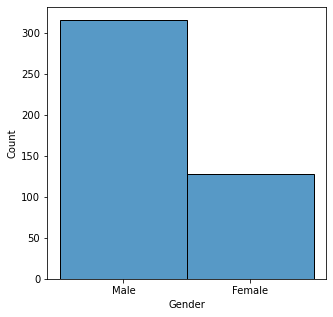

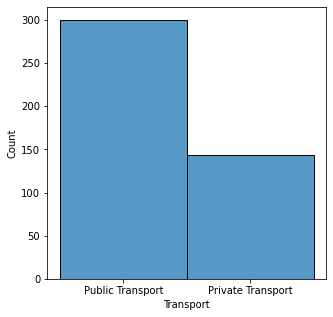

In [7]:
for feature in data.columns: 
    if data[feature].dtype == 'object':
        fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(5,5))
        sns.histplot(data[feature])
        plt.savefig(feature,format="jpeg",bbox_inches="tight")    

In [8]:
for feature in data.columns:
    if data[feature].dtype != 'object':
        print(feature)
        print(data[feature].value_counts())
        print((round(data[feature].value_counts().sum()*100/444)),"%","\n")

Age
26    63
27    49
28    46
24    46
25    37
30    34
29    26
23    24
31    16
22    15
32    13
33    11
34    11
38     9
21     8
39     7
40     7
36     6
20     5
37     4
35     2
18     2
19     1
42     1
43     1
Name: Age, dtype: int64
100 % 

Engineer
1    335
0    109
Name: Engineer, dtype: int64
100 % 

MBA
0    332
1    112
Name: MBA, dtype: int64
100 % 

Work Exp
4     54
2     47
3     46
6     46
5     42
0     29
7     28
8     28
1     22
9     21
10    14
11    11
19    10
14     8
21     6
20     6
16     5
12     5
18     5
13     3
22     3
17     2
15     2
24     1
Name: Work Exp, dtype: int64
100 % 

Salary
14.6    22
8.5     13
13.6    12
12.8    12
14.9    11
        ..
16.7     1
22.7     1
29.9     1
18.9     1
50.0     1
Name: Salary, Length: 122, dtype: int64
100 % 

Distance
12.2    12
8.1     11
9.0      9
11.7     8
9.4      7
        ..
14.5     1
15.4     1
16.2     1
16.5     1
23.4     1
Name: Distance, Length: 137, dtype: int64
100 % 

lic

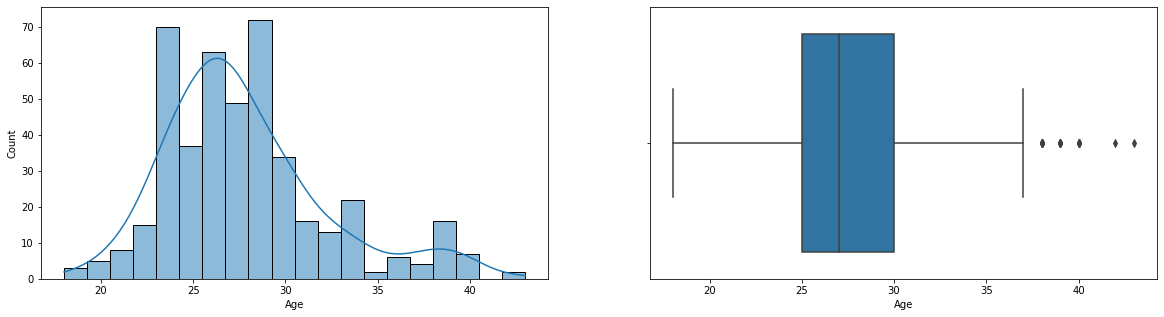

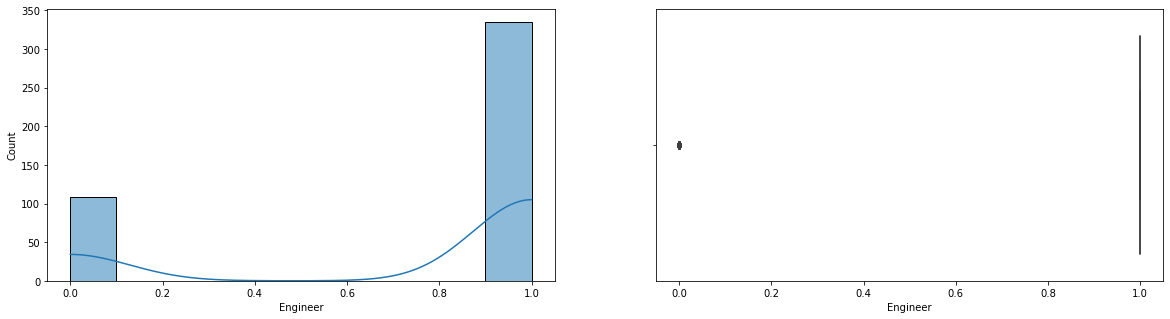

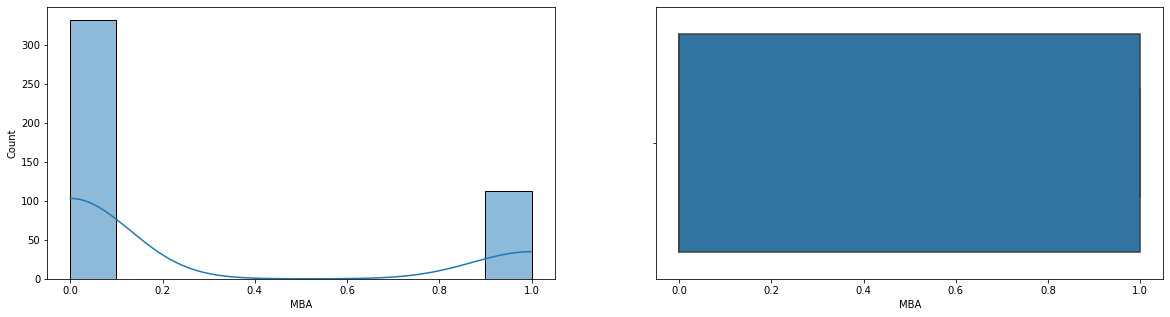

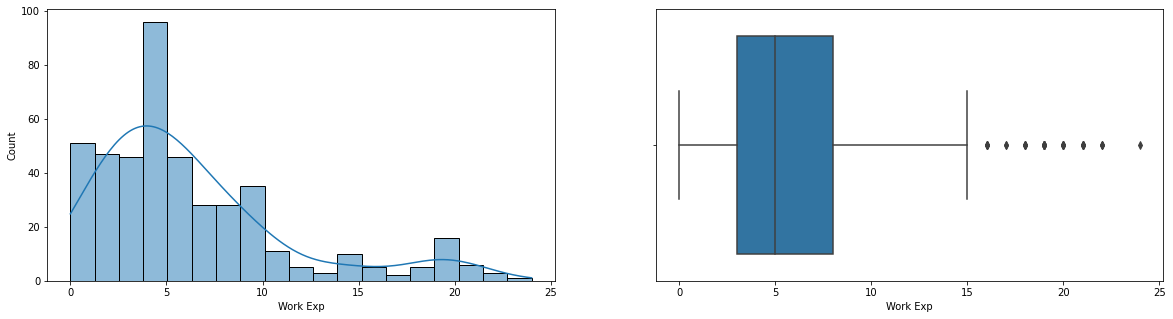

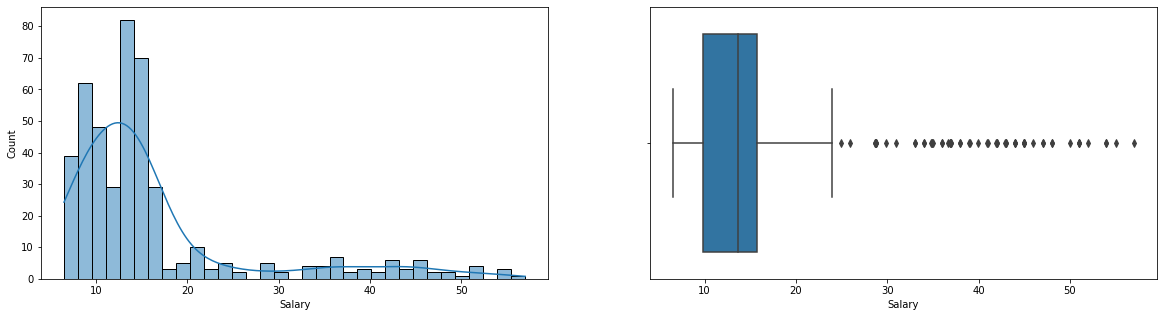

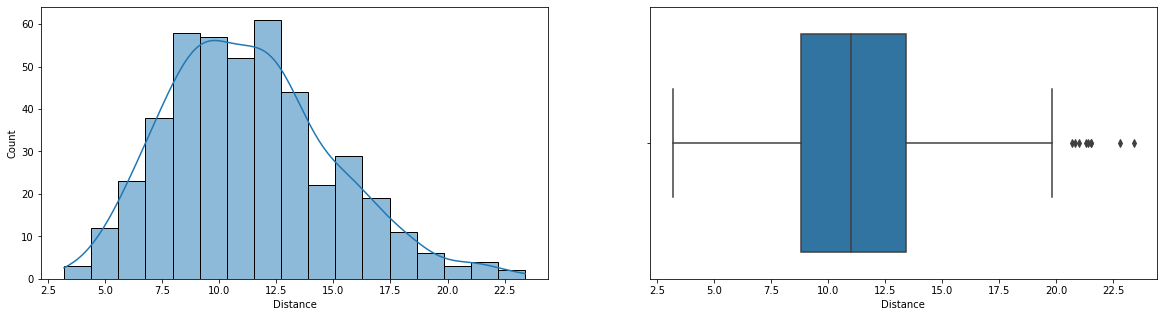

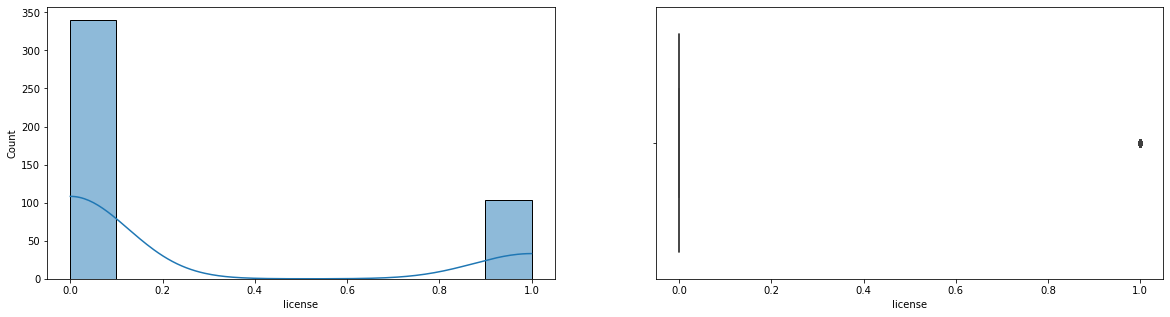

In [9]:
for feature in data.columns: 
    if data[feature].dtype != 'object':
        fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
        sns.histplot(data[feature], kde=True, ax=axs[0])
        sns.boxplot(x=feature,data=data, ax=axs[1])
        plt.savefig(feature,format="jpeg",bbox_inches="tight")   

In [10]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Gender', 'Transport']
['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']


In [11]:
data[cat].describe().T

,count,unique,top,freq
Gender,444,2,Male,316
Transport,444,2,Public Transport,300


In [12]:
data.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [13]:
data[num].describe(percentiles = [0.05,0.25,0.5,0.75,0.8,0.85,0.95,0.99,0.995]).T

,count,mean,std,min,5%,25%,50%,75%,80%,85%,95%,99%,99.5%,max
Age,444.0,27.747748,4.416710,18.0,22.0,25.0,27.0,30.000,30.00,32.000,38.000,40.000,40.0,43.0
Engineer,444.0,0.754505,0.430866,0.0,0.0,1.0,1.0,1.000,1.00,1.000,1.000,1.000,1.0,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,0.0,1.000,1.00,1.000,1.000,1.000,1.0,1.0
Work Exp,444.0,6.299550,5.112098,0.0,0.0,3.0,5.0,8.000,9.00,10.550,19.000,21.000,22.0,24.0
Salary,444.0,16.238739,10.453851,6.5,7.6,9.8,13.6,15.725,17.00,22.295,43.000,51.570,54.0,57.0
Distance,444.0,11.323198,3.606149,3.2,6.1,8.8,11.0,13.425,14.14,15.200,17.885,21.357,21.5,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.0,0.000,1.00,1.000,1.000,1.000,1.0,1.0


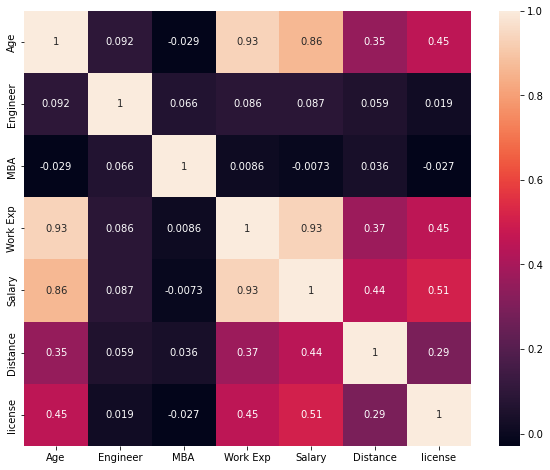

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()
plt.savefig('heat.jpeg', square = True)

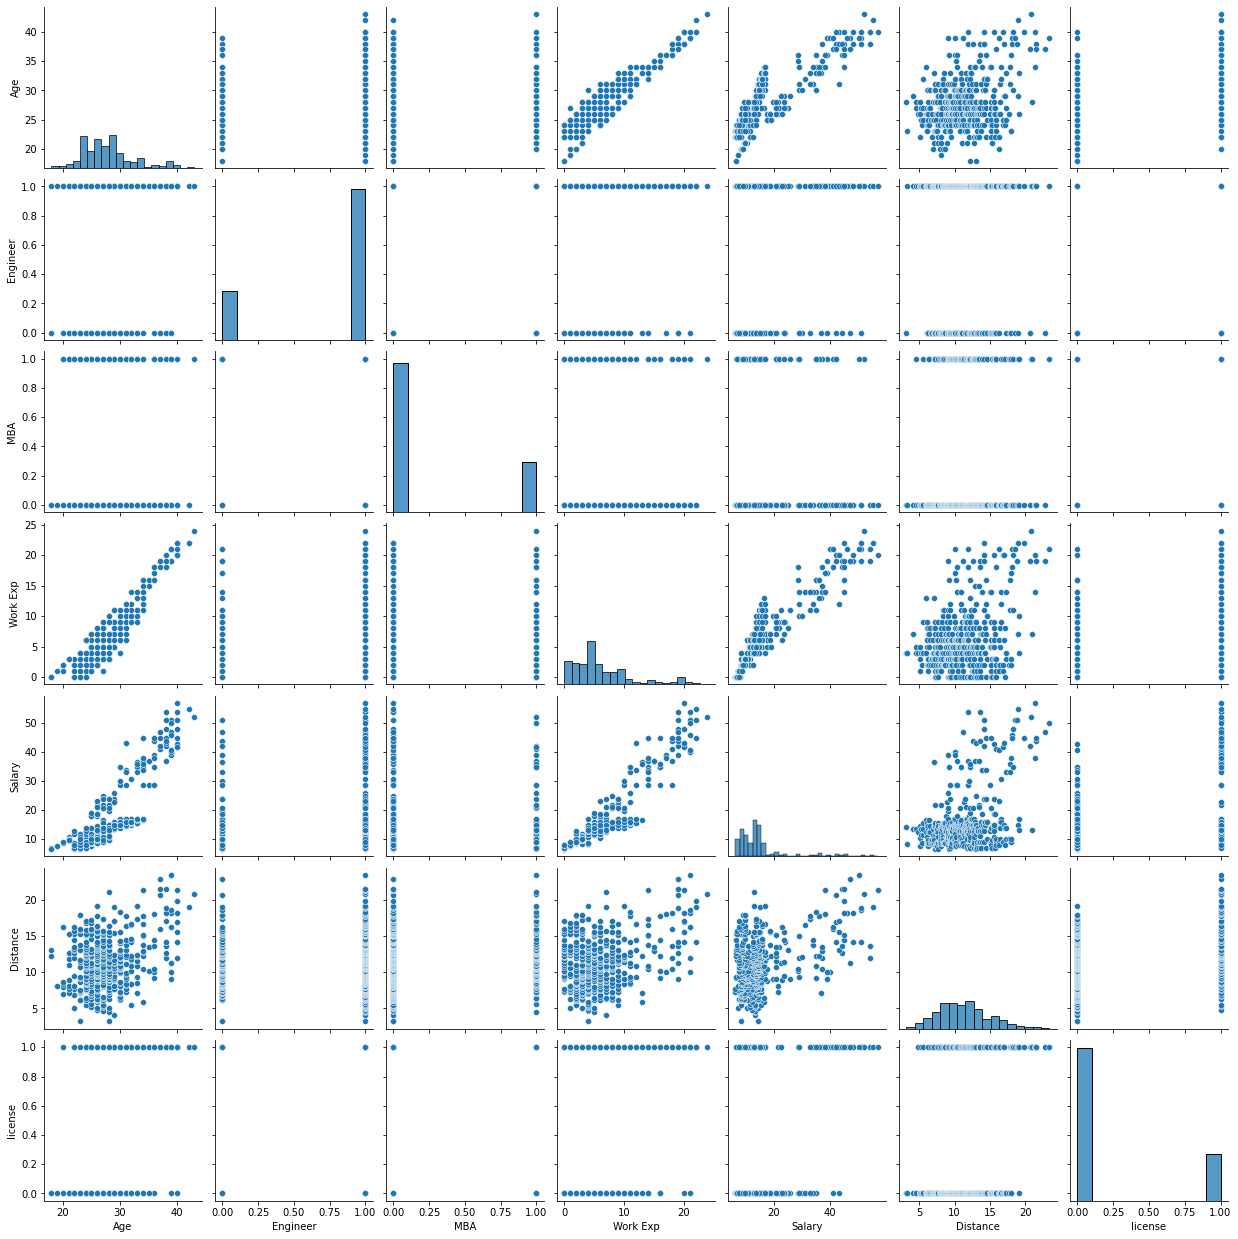

In [15]:
sns.pairplot(data)
plt.savefig("Pairplot.jpeg",bbox_inches="tight")

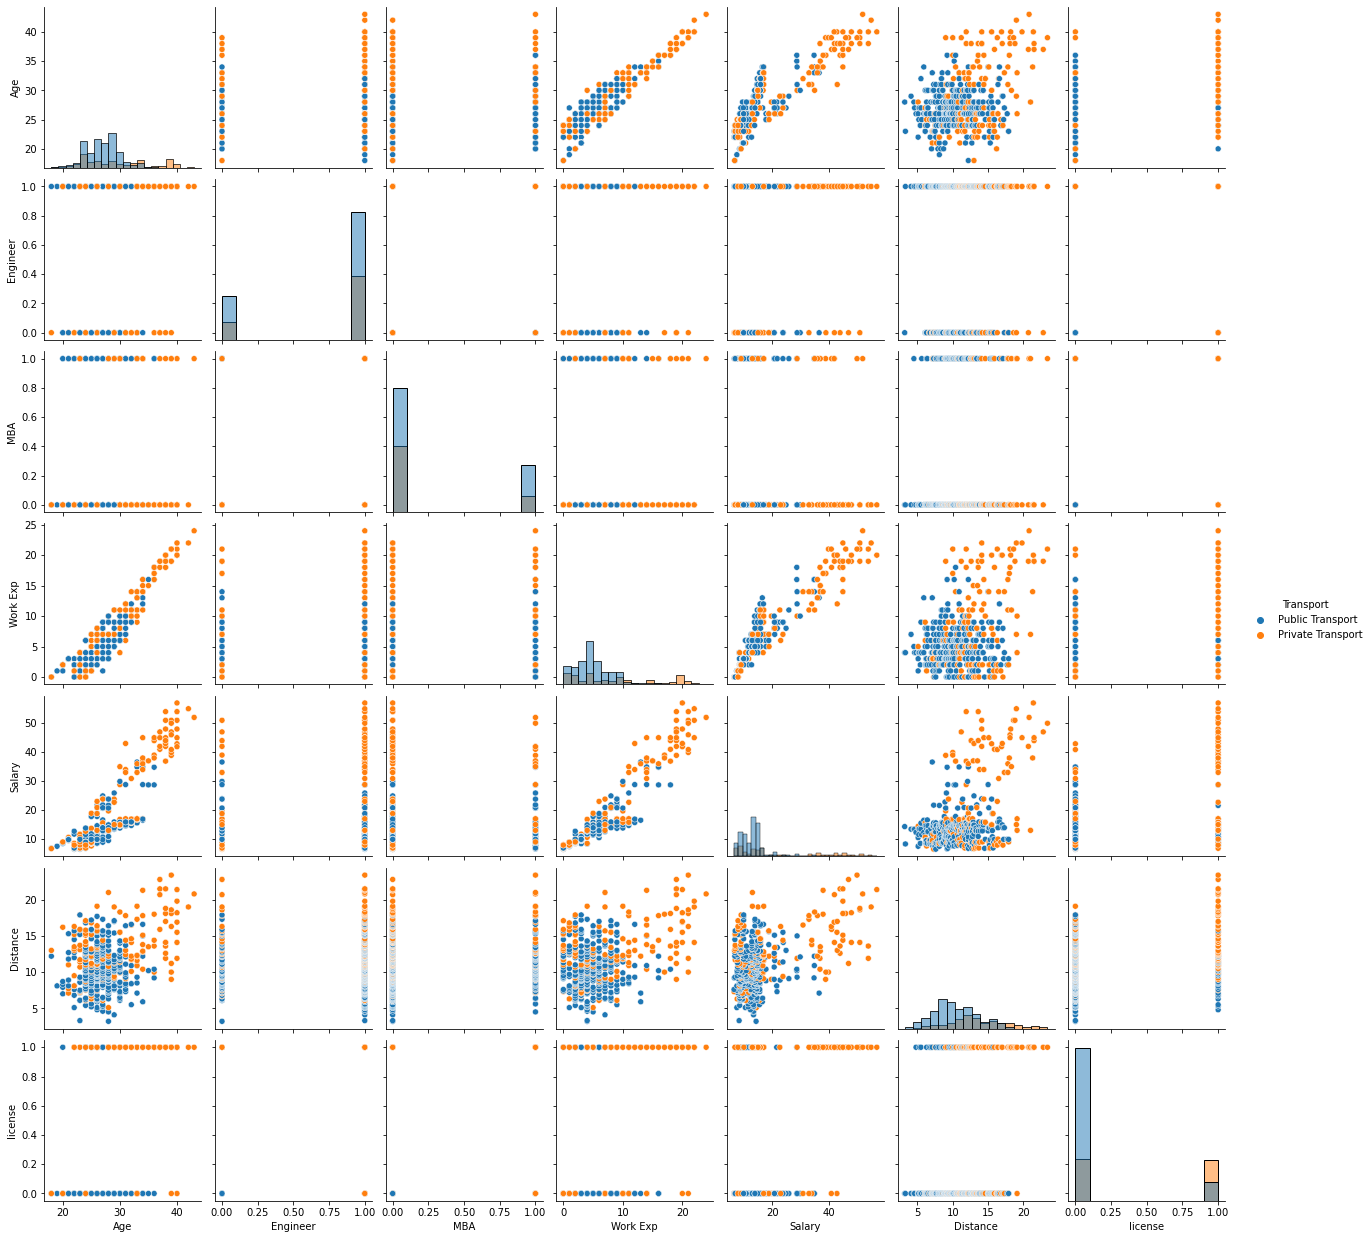

In [16]:
# Pairplot using sns
sns.pairplot(data ,diag_kind='hist' ,hue='Transport');
plt.savefig("ColoredPairplot.jpeg",bbox_inches="tight")

In [17]:
cat

['Gender', 'Transport']

In [18]:
df =pd.get_dummies(data, columns=cat,drop_first=True)

In [19]:
df.head()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Gender_Male,Transport_Public Transport
0,28,0,0,4,14.3,3.2,0,1,1
1,23,1,0,4,8.3,3.3,0,0,1
2,29,1,0,7,13.4,4.1,0,1,1
3,28,1,1,5,13.4,4.5,0,0,1
4,27,1,0,4,13.4,4.6,0,1,1


In [20]:
print(num)

['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']


In [21]:
df[num] = df[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [22]:
df.head()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Gender_Male,Transport_Public Transport
0,0.40,0.0,0.0,0.166667,0.154455,0.000000,0.0,1,1
1,0.20,1.0,0.0,0.166667,0.035644,0.004950,0.0,0,1
2,0.44,1.0,0.0,0.291667,0.136634,0.044554,0.0,1,1
3,0.40,1.0,1.0,0.208333,0.136634,0.064356,0.0,0,1
4,0.36,1.0,0.0,0.166667,0.136634,0.069307,0.0,1,1


In [23]:
df.columns

Index(['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license',
       'Gender_Male', 'Transport_Public Transport'],
      dtype='object')

In [24]:
# Copy all the predictor variables into X dataframe
X = df.drop('Transport_Public Transport', axis=1)

# Copy target into the y dataframe.  
y = df['Transport_Public Transport']

In [25]:
X.head()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Gender_Male
0,0.40,0.0,0.0,0.166667,0.154455,0.000000,0.0,1
1,0.20,1.0,0.0,0.166667,0.035644,0.004950,0.0,0
2,0.44,1.0,0.0,0.291667,0.136634,0.044554,0.0,1
3,0.40,1.0,1.0,0.208333,0.136634,0.064356,0.0,0
4,0.36,1.0,0.0,0.166667,0.136634,0.069307,0.0,1


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Transport_Public Transport, dtype: uint8

In [27]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### A. Logistic Regression Model

In [28]:
LR_model= LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
LR_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.5s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [29]:
## Performance Matrix on train data set
y_train_predict = LR_model.predict(X_train)
LR_model_score_train = LR_model.score(X_train, y_train)

In [30]:
print('LR-Model_Score-train: %.3f' % LR_model_score_train)
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

LR-Model_Score-train: 0.787
**********************************************************
Confusion Matrix:
[[ 58  44]
 [ 22 186]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       102
           1       0.81      0.89      0.85       208

    accuracy                           0.79       310
   macro avg       0.77      0.73      0.74       310
weighted avg       0.78      0.79      0.78       310



LR-AUC-train: 0.84
LR-Precision-train: 0.81
LR-Recall-train: 0.89
LR-f1_score-train: 0.85


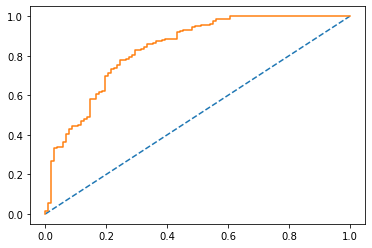

In [31]:
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
LR_auc_train = roc_auc_score(y_train, probs)
print('LR-AUC-train: %.2f' % LR_auc_train)
LR_precision_train = precision_score(y_train, y_train_predict)
print('LR-Precision-train: %.2f' % LR_precision_train)
LR_recall_train = recall_score(y_train, y_train_predict)
print('LR-Recall-train: %.2f' % LR_recall_train)
LR_f1_score_train = f1_score(y_train, y_train_predict)
print('LR-f1_score-train: %.2f' % LR_f1_score_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.savefig("LR-TrainData.jpeg")

In [32]:
## Performance Matrix on test data set
y_test_predict = LR_model.predict(X_test)
LR_model_score_test = LR_model.score(X_test, y_test)

In [33]:
print("LR-Model_Score-test:",round(LR_model_score_test,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

LR-Model_Score-test: 0.81
**********************************************************
Confusion Matrix:
[[25 17]
 [ 9 83]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        42
           1       0.83      0.90      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.75      0.76       134
weighted avg       0.80      0.81      0.80       134



LR-AUC-test: 0.82
LR-Precision-test: 0.83
LR-Recall-test: 0.90
LR-f1_score-test: 0.86


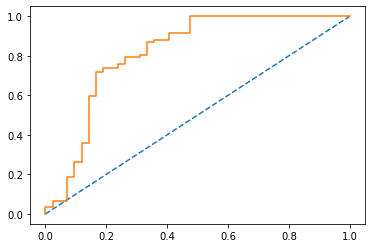

In [34]:
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
LR_auc_test = roc_auc_score(y_test, probs)
print('LR-AUC-test: %.2f' % LR_auc_test)
LR_precision_test = precision_score(y_test, y_test_predict)
print('LR-Precision-test: %.2f' % LR_precision_test)
LR_recall_test = recall_score(y_test, y_test_predict)
print('LR-Recall-test: %.2f' % LR_recall_test)
LR_f1_score_test = f1_score(y_test, y_test_predict)
print('LR-f1_score-test: %.2f' % LR_f1_score_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.savefig("LR-TestData.jpeg")

### B. Linear Discriminant Analysis

In [35]:
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [36]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
LDA_model_score_train = LDA_model.score(X_train, y_train)

In [37]:
print("LDA-Model_Score-train:",round(LDA_model_score_train,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

LDA-Model_Score-train: 0.8
**********************************************************
Confusion Matrix:
[[ 57  45]
 [ 17 191]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       102
           1       0.81      0.92      0.86       208

    accuracy                           0.80       310
   macro avg       0.79      0.74      0.75       310
weighted avg       0.80      0.80      0.79       310



LDA-AUC-train: 0.83
LDA-Precision-train: 0.81
LDA-Recall-train: 0.92
LDA-f1_score-train: 0.86


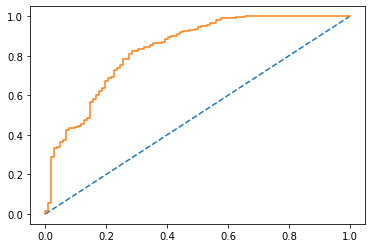

In [38]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
LDA_auc_train = roc_auc_score(y_train, probs)
print('LDA-AUC-train: %.2f' % LDA_auc_train)
LDA_precision_train = precision_score(y_train, y_train_predict)
print('LDA-Precision-train: %.2f' % LDA_precision_train)
LDA_recall_train = recall_score(y_train, y_train_predict)
print('LDA-Recall-train: %.2f' % LDA_recall_train)
LDA_f1_score_train = f1_score(y_train, y_train_predict)
print('LDA-f1_score-train: %.2f' % LDA_f1_score_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.savefig("LDA-TrainData.jpeg")

In [39]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
LDA_model_score_test = LDA_model.score(X_test, y_test)

In [40]:
print("LDA-Model_Score-test:",round(LDA_model_score_test,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

LDA-Model_Score-test: 0.82
**********************************************************
Confusion Matrix:
[[26 16]
 [ 8 84]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        42
           1       0.84      0.91      0.87        92

    accuracy                           0.82       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.82      0.82      0.82       134



LDA-AUC-test: 0.81
LDA-Precision-test: 0.84
LDA-Recall-test: 0.91
LDA-f1_score-test: 0.87


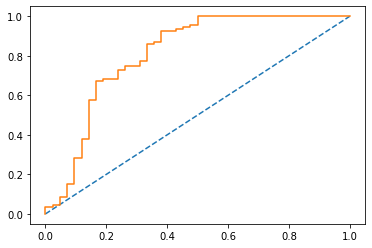

In [41]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
LDA_auc_test = roc_auc_score(y_test, probs)
print('LDA-AUC-test: %.2f' % LDA_auc_test)
LDA_precision_test = precision_score(y_test, y_test_predict)
print('LDA-Precision-test: %.2f' % LDA_precision_test)
LDA_recall_test = recall_score(y_test, y_test_predict)
print('LDA-Recall-test: %.2f' % LDA_recall_test)
LDA_f1_score_test = f1_score(y_test, y_test_predict)
print('LDA-f1_score-test: %.2f' % LDA_f1_score_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.savefig("LDA-TestData.jpeg")

### C. CART

In [42]:
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
DT_model_score_train = DT_model.score(X_train, y_train)

In [44]:
print("DT-Model_Score-train:",round(DT_model_score_train,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

DT-Model_Score-train: 1.0
**********************************************************
Confusion Matrix:
[[102   0]
 [  0 208]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



DT-AUC-train: 1.00
DT-Precision-train: 1.00
DT-Recall-train: 1.00
DT-f1_score-train: 1.00


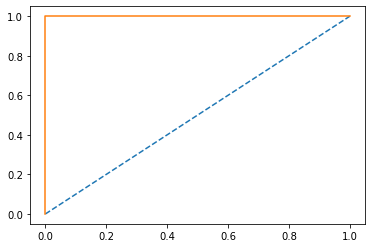

In [45]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
DT_auc_train = roc_auc_score(y_train, probs)
print('DT-AUC-train: %.2f' % DT_auc_train)
DT_precision_train = precision_score(y_train, y_train_predict)
print('DT-Precision-train: %.2f' % DT_precision_train)
DT_recall_train = recall_score(y_train, y_train_predict)
print('DT-Recall-train: %.2f' % DT_recall_train)
DT_f1_score_train = f1_score(y_train, y_train_predict)
print('DT-f1_score-train: %.2f' % DT_f1_score_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.savefig("CART-TrainData.jpeg")

In [46]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
DT_model_score_test = DT_model.score(X_test, y_test)

In [47]:
print("DT-Model_Score-test:",round(DT_model_score_test,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

DT-Model_Score-test: 0.77
**********************************************************
Confusion Matrix:
[[29 13]
 [18 74]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65        42
           1       0.85      0.80      0.83        92

    accuracy                           0.77       134
   macro avg       0.73      0.75      0.74       134
weighted avg       0.78      0.77      0.77       134



DT-AUC-test: 0.75
DT-Precision-test: 0.85
DT-Recall-test: 0.80
DT-f1_score-test: 0.83


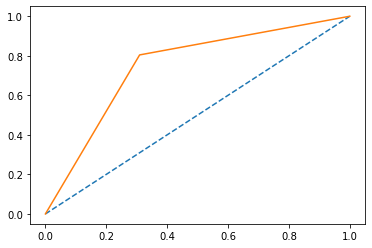

In [48]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
DT_auc_test = roc_auc_score(y_test, probs)
print('DT-AUC-test: %.2f' % DT_auc_test)
DT_precision_test = precision_score(y_test, y_test_predict)
print('DT-Precision-test: %.2f' % DT_precision_test)
DT_recall_test = recall_score(y_test, y_test_predict)
print('DT-Recall-test: %.2f' % DT_recall_test)
DT_f1_score_test = f1_score(y_test, y_test_predict)
print('DT-f1_score-test: %.2f' % DT_f1_score_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.savefig("CART-TestData.jpeg")

### D. Naive Bayes Model

In [49]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [50]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
NB_model_score_train = NB_model.score(X_train, y_train)

In [51]:
print("NB-Model_Score-train:",round(NB_model_score_train,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

NB-Model_Score-train: 0.79
**********************************************************
Confusion Matrix:
[[ 51  51]
 [ 13 195]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.61       102
           1       0.79      0.94      0.86       208

    accuracy                           0.79       310
   macro avg       0.79      0.72      0.74       310
weighted avg       0.79      0.79      0.78       310



NB-AUC-train: 0.80
NB-Precision-train: 0.79
NB-Recall-train: 0.94
NB-f1_score-train: 0.86


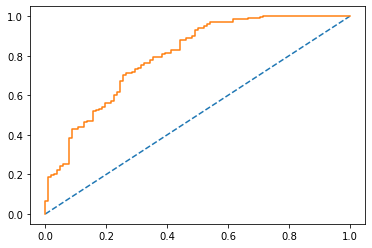

In [52]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
NB_auc_train = roc_auc_score(y_train, probs)
print('NB-AUC-train: %.2f' % NB_auc_train)
NB_precision_train = precision_score(y_train, y_train_predict)
print('NB-Precision-train: %.2f' % NB_precision_train)
NB_recall_train = recall_score(y_train, y_train_predict)
print('NB-Recall-train: %.2f' % NB_recall_train)
NB_f1_score_train = f1_score(y_train, y_train_predict)
print('NB-f1_score-train: %.2f' % NB_f1_score_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.savefig("NB-TrainData.jpeg")

In [53]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
NB_model_score_test = NB_model.score(X_test, y_test)

In [54]:
print("NB-Model_Score-test:",round(NB_model_score_test,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

NB-Model_Score-test: 0.79
**********************************************************
Confusion Matrix:
[[22 20]
 [ 8 84]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.52      0.61        42
           1       0.81      0.91      0.86        92

    accuracy                           0.79       134
   macro avg       0.77      0.72      0.73       134
weighted avg       0.78      0.79      0.78       134



NB-AUC-test: 0.78
NB-Precision-test: 0.81
NB-Recall-test: 0.91
NB-f1_score-test: 0.86


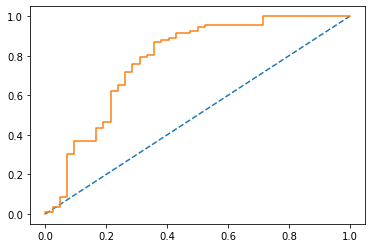

In [55]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
NB_auc_test = roc_auc_score(y_test, probs)
print('NB-AUC-test: %.2f' % NB_auc_test)
NB_precision_test = precision_score(y_test, y_test_predict)
print('NB-Precision-test: %.2f' % NB_precision_test)
NB_recall_test = recall_score(y_test, y_test_predict)
print('NB-Recall-test: %.2f' % NB_recall_test)
NB_f1_score_test = f1_score(y_test, y_test_predict)
print('NB-f1_score-test: %.2f' % NB_f1_score_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.savefig("NB-TestData.jpeg")

### E. KNN Model

In [56]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score_train = KNN_model.score(X_train, y_train)

In [58]:
print("KNN-Model_Score-train:",round(KNN_model_score_train,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

KNN-Model_Score-train: 0.84
**********************************************************
Confusion Matrix:
[[ 65  37]
 [ 13 195]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       102
           1       0.84      0.94      0.89       208

    accuracy                           0.84       310
   macro avg       0.84      0.79      0.80       310
weighted avg       0.84      0.84      0.83       310



KNN-AUC-train: 0.92
KNN-Precision-train: 0.84
KNN-Recall-train: 0.94
KNN-f1_score-train: 0.89


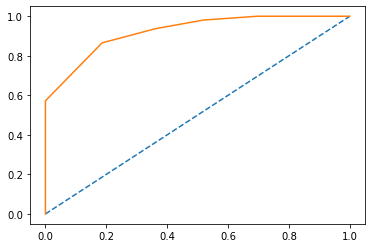

In [59]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
KNN_auc_train = roc_auc_score(y_train, probs)
print('KNN-AUC-train: %.2f' % KNN_auc_train)
KNN_precision_train = precision_score(y_train, y_train_predict)
print('KNN-Precision-train: %.2f' % KNN_precision_train)
KNN_recall_train = recall_score(y_train, y_train_predict)
print('KNN-Recall-train: %.2f' % KNN_recall_train)
KNN_f1_score_train = f1_score(y_train, y_train_predict)
print('KNN-f1_score-train: %.2f' % KNN_f1_score_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.savefig("KNN-TrainData.jpeg")

In [60]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score_test = KNN_model.score(X_test, y_test)

In [61]:
print("KNN-Model_Score-test:",round(KNN_model_score_test,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

KNN-Model_Score-test: 0.78
**********************************************************
Confusion Matrix:
[[22 20]
 [ 9 83]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.52      0.60        42
           1       0.81      0.90      0.85        92

    accuracy                           0.78       134
   macro avg       0.76      0.71      0.73       134
weighted avg       0.78      0.78      0.77       134



KNN-AUC-test: 0.76
KNN-Precision-test: 0.81
KNN-Recall-test: 0.90
KNN-f1_score-test: 0.85


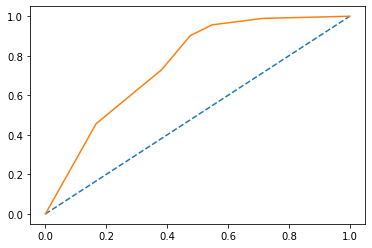

In [62]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
KNN_auc_test = roc_auc_score(y_test, probs)
print('KNN-AUC-test: %.2f' % KNN_auc_test)
KNN_precision_test = precision_score(y_test, y_test_predict)
print('KNN-Precision-test: %.2f' % KNN_precision_test)
KNN_recall_test = recall_score(y_test, y_test_predict)
print('KNN-Recall-test: %.2f' % KNN_recall_test)
KNN_f1_score_test = f1_score(y_test, y_test_predict)
print('KNN-f1_score-test: %.2f' % KNN_f1_score_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.savefig("KNN-TestData.jpeg")

### F. Random Forest

In [63]:
RF_model=RandomForestClassifier(random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [64]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
RF_model_score_train =RF_model.score(X_train, y_train)

In [65]:
print("RF-Model_Score-train:",round(RF_model_score_train,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

RF-Model_Score-train: 1.0
**********************************************************
Confusion Matrix:
[[102   0]
 [  0 208]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



RF-AUC-train: 1.00
RF-Precision-train: 1.00
RF-Recall-train: 1.00
RF-f1_score-train: 1.00


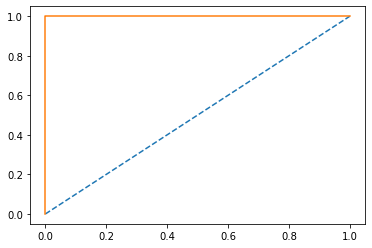

In [66]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
RF_auc_train = roc_auc_score(y_train, probs)
print('RF-AUC-train: %.2f' % RF_auc_train)
RF_precision_train = precision_score(y_train, y_train_predict)
print('RF-Precision-train: %.2f' % RF_precision_train)
RF_recall_train = recall_score(y_train, y_train_predict)
print('RF-Recall-train: %.2f' % RF_recall_train)
RF_f1_score_train = f1_score(y_train, y_train_predict)
print('RF-f1_score-train: %.2f' % RF_f1_score_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.savefig("RF-TrainData.jpeg")

In [67]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
RF_model_score_test = RF_model.score(X_test, y_test)

In [68]:
print("RF-Model_Score-test:",round(RF_model_score_test,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

RF-Model_Score-test: 0.82
**********************************************************
Confusion Matrix:
[[26 16]
 [ 8 84]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        42
           1       0.84      0.91      0.87        92

    accuracy                           0.82       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.82      0.82      0.82       134



RF-AUC-test: 0.83
RF-Precision-test: 0.84
RF-Recall-test: 0.91
RF-f1_score-test: 0.87


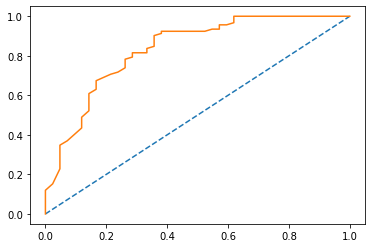

In [69]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
RF_auc_test = roc_auc_score(y_test, probs)
print('RF-AUC-test: %.2f' % RF_auc_test)
RF_precision_test = precision_score(y_test, y_test_predict)
print('RF-Precision-test: %.2f' % RF_precision_test)
RF_recall_test = recall_score(y_test, y_test_predict)
print('RF-Recall-test: %.2f' % RF_recall_test)
RF_f1_score_test = f1_score(y_test, y_test_predict)
print('RF-f1_score-test: %.2f' % RF_f1_score_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.savefig("RF-TestData.jpeg")

### G. Boosting Classifier with Gradient Boost

In [70]:
GBCL = GradientBoostingClassifier(random_state=1)
GBCL = GBCL.fit(X_train, y_train)

In [71]:
## Performance Matrix on train data set
y_train_predict = GBCL.predict(X_train)
GBCL_model_score_train = GBCL.score(X_train, y_train)

In [72]:
print("GBCL-Model_Score-train:",round(GBCL_model_score_train,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

GBCL-Model_Score-train: 0.97
**********************************************************
Confusion Matrix:
[[ 93   9]
 [  1 207]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       102
           1       0.96      1.00      0.98       208

    accuracy                           0.97       310
   macro avg       0.97      0.95      0.96       310
weighted avg       0.97      0.97      0.97       310



GBCL-AUC-train: 1.00
GBCL-Precision-train: 0.96
GBCL-Recall-train: 1.00
GBCL-f1_score-train: 0.98


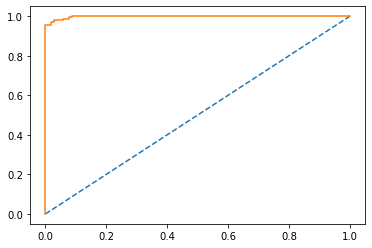

In [73]:
# predict probabilities
probs = GBCL.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
GBCL_auc_train = roc_auc_score(y_train, probs)
print('GBCL-AUC-train: %.2f' % GBCL_auc_train)
GBCL_precision_train = precision_score(y_train, y_train_predict)
print('GBCL-Precision-train: %.2f' % GBCL_precision_train)
GBCL_recall_train = recall_score(y_train, y_train_predict)
print('GBCL-Recall-train: %.2f' % GBCL_recall_train)
GBCL_f1_score_train = f1_score(y_train, y_train_predict)
print('GBCL-f1_score-train: %.2f' % GBCL_f1_score_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.savefig("GBCL-TrainData.jpeg")

In [74]:
## Performance Matrix on test data set
y_test_predict = GBCL.predict(X_test)
GBCL_model_score_test = GBCL.score(X_test, y_test)

In [75]:
print("GBCL-Model_Score-test:",round(GBCL_model_score_test,2))
print("**********************************************************")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_predict))
print("**********************************************************")
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

GBCL-Model_Score-test: 0.76
**********************************************************
Confusion Matrix:
[[25 17]
 [15 77]]
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        42
           1       0.82      0.84      0.83        92

    accuracy                           0.76       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.76      0.76      0.76       134



GBCL-AUC-test: 0.81
GBCL-Precision-test: 0.82
GBCL-Recall-test: 0.84
GBCL-f1_score-test: 0.83


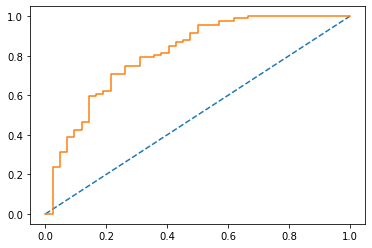

In [76]:
# predict probabilities
probs = GBCL.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC, Precision, Recall, f1 score
GBCL_auc_test = roc_auc_score(y_test, probs)
print('GBCL-AUC-test: %.2f' % GBCL_auc_test)
GBCL_precision_test = precision_score(y_test, y_test_predict)
print('GBCL-Precision-test: %.2f' % GBCL_precision_test)
GBCL_recall_test = recall_score(y_test, y_test_predict)
print('GBCL-Recall-test: %.2f' % GBCL_recall_test)
GBCL_f1_score_test = f1_score(y_test, y_test_predict)
print('GBCL-f1_score-test: %.2f' % GBCL_f1_score_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.savefig("GBCL-TestData.jpeg")

### SCORES

In [77]:
model_score_train = [LR_model_score_train,LDA_model_score_train,DT_model_score_train,NB_model_score_train,KNN_model_score_train,RF_model_score_train,GBCL_model_score_train]
auc_score_train = [LR_auc_train,LDA_auc_train,DT_auc_train,NB_auc_train,KNN_auc_train,RF_auc_train,GBCL_auc_train]
recall_train = [LR_recall_train,LDA_recall_train,DT_recall_train,NB_recall_train,KNN_recall_train,RF_recall_train,GBCL_recall_train]
precision_train = [LR_precision_train,LDA_precision_train,DT_precision_train,NB_precision_train,KNN_precision_train,RF_precision_train,GBCL_precision_train]
f1_score_train = [LR_f1_score_train,LDA_f1_score_train,DT_f1_score_train,NB_f1_score_train,KNN_f1_score_train,RF_f1_score_train,GBCL_f1_score_train]

In [78]:
model_score_test = [LR_model_score_test,LDA_model_score_test,DT_model_score_test,NB_model_score_test,KNN_model_score_test,RF_model_score_test,GBCL_model_score_test]
auc_score_test = [LR_auc_test,LDA_auc_test,DT_auc_test,NB_auc_test,KNN_auc_test,RF_auc_test,GBCL_auc_test]
recall_test = [LR_recall_test,LDA_recall_test,DT_recall_test,NB_recall_test,KNN_recall_test,RF_recall_test,GBCL_recall_test]
precision_test = [LR_precision_test,LDA_precision_test,DT_precision_test,NB_precision_test,KNN_precision_test,RF_precision_test,GBCL_precision_test]
f1_score_test = [LR_f1_score_test,LDA_f1_score_test,DT_f1_score_test,NB_f1_score_test,KNN_f1_score_test,RF_f1_score_test,GBCL_f1_score_test]

In [79]:
# Scores

scores_df = pd.DataFrame({'Model Score - Train':model_score_train,
                          'AUC Score - Train':auc_score_train,
                          'Recall - Train':recall_train,
                          'Precision - Train':precision_train,
                          'f1 Score - Train':f1_score_train,
                          'Model Score - Test':model_score_test,
                          'AUC Score - Test':auc_score_test,
                          'Recall - Test':recall_test,
                          'Precision - Test':precision_test,
                          'f1 Score - Test':f1_score_test},
                         index =['Logistic Regression',
                                 'LDA',
                                 'CART',
                                 'Naive Bayes',
                                 'KNN',
                                 'Random Forest',
                                 'Classifier using Gradient Boost'])

scores_df

,Model Score - Train,AUC Score - Train,Recall - Train,Precision - Train,f1 Score - Train,Model Score - Test,AUC Score - Test,Recall - Test,Precision - Test,f1 Score - Test
Logistic Regression,0.787097,0.835313,0.894231,0.808696,0.849315,0.805970,0.816253,0.902174,0.830000,0.864583
LDA,0.800000,0.833522,0.918269,0.809322,0.860360,0.820896,0.809783,0.913043,0.840000,0.875000
CART,1.000000,1.000000,1.000000,1.000000,1.000000,0.768657,0.747412,0.804348,0.850575,0.826816
Naive Bayes,0.793548,0.797511,0.937500,0.792683,0.859031,0.791045,0.780538,0.913043,0.807692,0.857143
KNN,0.838710,0.922111,0.937500,0.840517,0.886364,0.783582,0.755305,0.902174,0.805825,0.851282
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.820896,0.831651,0.913043,0.840000,0.875000
Classifier using Gradient Boost,0.967742,0.997973,0.995192,0.958333,0.976415,0.761194,0.811853,0.836957,0.819149,0.827957
